In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [4]:
digits = datasets.load_digits()

In [5]:
data,labels = digits.data,digits.target

labels = (labels>4).astype(np.int)

In [6]:
test_size = 0.25
random_state = 2019
train_data,test_data,train_labels,test_labels = train_test_split(data,
                                                                labels,
                                                                test_size = test_size,
                                                                random_state = random_state)

In [7]:
std = StandardScaler()
train_data = std.fit(train_data).transform(train_data)
test_data = std.transform(test_data)

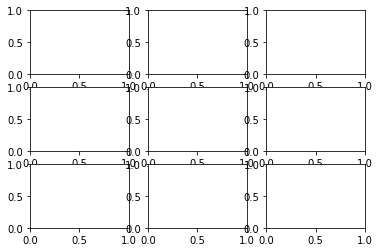

In [8]:
l1_ratio = 0.5

fig,axes = plt.subplots(3,3)

In [9]:
for i ,(C,axes_row) in enumerate(zip((1,0.1,0.01),axes)):
    #三种不同惩罚项的模型搭建     
    clf_l1_lr = LogisticRegression(C=C,penalty="l1",tol=0.01,solver="saga")
    clf_l2_lr = LogisticRegression(C=C,penalty="l2",tol=0.01,solver="saga")
    clf_en_lr = LogisticRegression(C=C,penalty="elasticnet",tol=0.01,l1_ratio=l1_ratio,
                                  solver="saga")
    
    #三种模型的训练     
    clf_l1_lr.fit(train_data,train_labels)
    clf_l2_lr.fit(train_data,train_labels)
    clf_en_lr.fit(train_data,train_labels)
    
    #三种模型训练好后的模型系数     
    coef_l1_lr = clf_l1_lr.coef_.ravel()
    coef_l2_lr = clf_l2_lr.coef_.ravel()
    coef_en_lr = clf_en_lr.coef_.ravel()
    
    #对三种模型的系数的稀疏性的计算     
    sparsity_l1_lr = np.mean(coef_l1_lr==0)*100
    sparsity_l2_lr = np.mean(coef_l2_lr==0)*100
    sparsity_en_lr = np.mean(coef_en_lr==0)*100
    
    print("C=%.2f"%C)
    print("{:<40}{:0.2f}".format("sparsity with l1 penalty:",sparsity_l1_lr))
    print("{:<40}{:0.2f}".format("sparsity with elastic-net penalty:",
                                sparsity_en_lr))
    print("{:<40}{:0.2f}".format("sparsity with l2 penalty:",
                                sparsity_l2_lr))
    
    print("{:<40}{:0.2f}".format("score with l1 penalty:",
                                clf_l1_lr.score(test_data,test_labels)))
    print("{:<40}{:0.2f}".format("score with elastic-net penalty:",
                                clf_en_lr.score(test_data,test_labels)))
    print("{:<40}{:0.2f}".format("score with l2 penalty:",
                                clf_l2_lr.score(test_data,test_labels)))
    
    
    if i==0:
        axes_row[0].set_title("l1 penalty")
        axes_row[1].set_title("elastic-net\nl1_ratio = %s"%l1_ratio)
        axes_row[2].set_title("l2 penalty")
        
        
    for ax,coefs in zip(axes_row,[coef_l1_lr,coef_en_lr,coef_l2_lr]):
        ax.imshow(np.abs(coefs.reshape(8,8)),interpolation="nearest",
                 cmap="binary",vmax=1,vmin=0)
        ax.set_xticks(())
        ax.set_yticks(())
        
    axes_row[0].set_ylabel("C = %s "%C)
    
plt.show()

C=1.00
sparsity with l1 penalty:               7.81
sparsity with elastic-net penalty:      4.69
sparsity with l2 penalty:               4.69
score with l1 penalty:                  0.89
score with elastic-net penalty:         0.89
score with l2 penalty:                  0.89
C=0.10
sparsity with l1 penalty:               35.94
sparsity with elastic-net penalty:      15.62
sparsity with l2 penalty:               4.69
score with l1 penalty:                  0.88
score with elastic-net penalty:         0.88
score with l2 penalty:                  0.88
C=0.01
sparsity with l1 penalty:               84.38
sparsity with elastic-net penalty:      78.12
sparsity with l2 penalty:               4.69
score with l1 penalty:                  0.85
score with elastic-net penalty:         0.85
score with l2 penalty:                  0.87
